In [2]:
import keras
from keras.layers import Dense, Input
from keras.models import Model
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [3]:
(x_train, _), (x_test, y_test) = mnist.load_data()

'max-min narmalize:請將數值標準化成0-1'

'reshape data size:請將圖片轉成一維(28, 28) -> (784)'

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28)
(10000, 28, 28)


In [3]:
###  encoder  ###
input_img = Input(shape=( ... ))  ## 輸入大小必須和圖片大小一樣
''''
請設計encoder的網路
''''
encoded = ...

encoder = Model(input_img, encoded) ## 建立encoder model，input_img是輸入層，encoded是輸出層

###  decoder  ###
latent_input = Input(shape=( ... ))  ## decoder的輸入大小必須和encoder最後一層輸出大小一樣
''''
請設計decoder的網路
''''
decoded = ... #最後一層activation選擇sigmoid

decoder = Model(latent_input, decoded) ## 建立decoder model，latent_input是輸入層，decoded是輸出層

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
###  autoencoder  ##
output_img = decoder(encoder(input_img))  ##把encoder和decoder接起來

autoencoder = Model(input_img, output_img)  ## 建立autoencoder model，input_img是輸入層，output是輸出層
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### (1)設定訓練集'輸入'，以及'輸出的目標'
### (2)設定測試集'輸入'，以及'輸出的目標'
autoencoder.fit( ... ,  ... ,
                epochs=...,
                batch_size=...,
                shuffle=True,
                validation_data=( ... , ... ))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2761 - val_loss: 0.2263
Epoch 2/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2217 - val_loss: 0.2163
Epoch 3/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2136 - val_loss: 0.2095
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2062 - val_loss: 0.2034
Epoch 5/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2012 - val_loss: 0.1993
Epoch 6/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1977 - val_loss: 0.1966
Epoch 7/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1953 - val_loss: 0.1948
Epoch 8/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1936 - val_loss: 0.1931
Epoch 9/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1922 - val_loss: 0.1917
Epoc

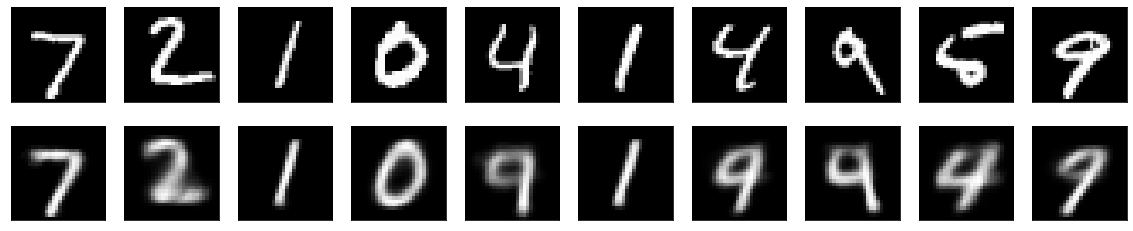

In [6]:
decoded_imgs = autoencoder.predict(x_test)
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()